# DASK TASK

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dask.distributed import Client


In [2]:
!pip install "dask[distributed]" --upgrade


In [3]:
# Generate a sample time series dataset
n_rows = 1000000  # One million rows
date_range = pd.date_range('2025-01-01', periods=n_rows, freq='min')  # 1-minute intervals

# Create random data
data = {
    'timestamp': date_range,
    'value': np.random.randn(n_rows),  # Random values
    'category': np.random.choice(['A', 'B', 'C'], n_rows)  # Random category
}

# Convert to a pandas DataFrame first, then to a Dask DataFrame
df = pd.DataFrame(data)
dask_df = dd.from_pandas(df, npartitions=4)  # Dask DataFrame with 4 partitions
dask_df.compute()

,timestamp,value,category
0,2025-01-01 00:00:00,-0.203440,B
1,2025-01-01 00:01:00,1.499693,A
2,2025-01-01 00:02:00,0.902157,A
3,2025-01-01 00:03:00,-2.815292,B
4,2025-01-01 00:04:00,-0.555987,B
...,...,...,...
999995,2026-11-26 10:35:00,0.259324,C
999996,2026-11-26 10:36:00,-0.410647,B
999997,2026-11-26 10:37:00,0.805967,C
999998,2026-11-26 10:38:00,0.040425,A


In [4]:
# Ensure 'timestamp' column is in datetime format
dask_df['timestamp'] = dd.to_datetime(dask_df['timestamp'])
dask_df['timestamp']

Dask Series Structure:
npartitions=4
0         datetime64[ns]
250000               ...
500000               ...
750000               ...
999999               ...
Dask Name: getitem, 5 expressions
Expr=Assign(frame=df)['timestamp']

In [5]:
# Drop rows with missing values
dask_df = dask_df.dropna()


In [6]:
# Resample data by day and calculate the mean for each category
dask_df['date'] = dask_df['timestamp'].dt.date  # Create a new 'date' column
daily_avg = dask_df.groupby(['date', 'category'])['value'].mean().compute()  # Compute the result

print(daily_avg.head())


date        category
2025-01-01  A           0.003461
            B          -0.000798
            C           0.030763
2025-01-02  A          -0.050079
            B          -0.063933
Name: value, dtype: float64


In [7]:
# Filter data for January 2025
filtered_data = dask_df[dask_df['timestamp'].dt.month == 1]

# Compute and display the first few rows
print(filtered_data.compute())


                 timestamp     value category        date
0      2025-01-01 00:00:00 -0.203440        B  2025-01-01
1      2025-01-01 00:01:00  1.499693        A  2025-01-01
2      2025-01-01 00:02:00  0.902157        A  2025-01-01
3      2025-01-01 00:03:00 -2.815292        B  2025-01-01
4      2025-01-01 00:04:00 -0.555987        B  2025-01-01
...                    ...       ...      ...         ...
570235 2026-01-31 23:55:00  0.108944        B  2026-01-31
570236 2026-01-31 23:56:00  0.805751        A  2026-01-31
570237 2026-01-31 23:57:00 -0.890144        B  2026-01-31
570238 2026-01-31 23:58:00  0.327953        A  2026-01-31
570239 2026-01-31 23:59:00 -2.319446        A  2026-01-31

[89280 rows x 4 columns]


In [11]:
from dask.distributed import Client
client = Client()  # Initialize Dask client (optional, but recommended for large datasets)


C:\Python312\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 59765 instead
  warnings.warn(


In [15]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
daily_avg_df = pd.DataFrame(dask_df)

# Convert pandas DataFrame to Dask DataFrame
daily_avg_dd = dd.from_pandas(daily_avg_df, npartitions=4)

# Now compute with Dask
with ProgressBar():
    result = daily_avg_dd.compute()  
print(result.head())


C:\Python312\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 23.85 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
C:\Python312\Lib\site-packages\distributed\client.py:3370: UserWarning: Sending large graph of size 58.78 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


                    0                     1  2           3
0 2025-01-01 00:00:00  -0.20344026930765396  B  2025-01-01
1 2025-01-01 00:01:00    1.4996928568995918  A  2025-01-01
2 2025-01-01 00:02:00    0.9021572426285861  A  2025-01-01
3 2025-01-01 00:03:00    -2.815291626268855  B  2025-01-01
4 2025-01-01 00:04:00   -0.5559869187924082  B  2025-01-01


In [16]:
!pip install dask[complete] pyarrow


In [34]:

import dask.dataframe as dd

# Load data directly with Dask
dask_df = dd.read_parquet('timeseries_data.parquet')
dask_df.compute()

# Convert the 'date' column to string


,timestamp,value,category,date
0,2025-01-01 00:00:00,0.694421,B,2025-01-01
1,2025-01-01 00:01:00,2.392051,A,2025-01-01
2,2025-01-01 00:02:00,0.903472,C,2025-01-01
3,2025-01-01 00:03:00,1.219047,A,2025-01-01
4,2025-01-01 00:04:00,0.139122,A,2025-01-01
...,...,...,...,...
999995,2026-11-26 10:35:00,1.230665,B,2026-11-26
999996,2026-11-26 10:36:00,3.421170,C,2026-11-26
999997,2026-11-26 10:37:00,-1.418192,A,2026-11-26
999998,2026-11-26 10:38:00,-0.121984,B,2026-11-26


In [32]:
#dask_df = dd.read_csv('timeseries_data.csv')
##dask_df.compute()

In [35]:
from dask import delayed, compute
import dask.dataframe as dd

# Example function to process data
def process_data(data_chunk):
    # Replace this with any operation you want to apply
        return data_chunk['value'].sum()  # Assuming 'value' is a column

# Assuming you already have a Dask DataFrame, e.g., 'dask_df'
# dask_df = dd.from_pandas(your_pandas_dataframe, npartitions=10)

# Convert Dask DataFrame into delayed chunks
delayed_chunks = dask_df.to_delayed()

# Apply `dask.delayed` to each chunk
delayed_results = [delayed(process_data)(chunk) for chunk in delayed_chunks]

# Compute the final results
final_results = compute(*delayed_results)

# Output the results
print(final_results)


(np.float64(201.89431805648658), np.float64(-390.7779819938074), np.float64(-625.8609558566286), np.float64(204.10886248860993))


In [36]:
dask_df.columns

Index(['timestamp', 'value', 'category', 'date'], dtype='object')

In [22]:
!pip install dask


In [37]:

from dask import delayed, compute 

# Example function to process data
def process_data(data_chunk):
    # Replace this with any operation you want to apply
    return sum(data_chunk)

# Example data (could be a large list)
data = list(range(1000))  # You could replace this with your actual data

# Split data into chunks (in this case, we split into 10 chunks)
chunk_size = 100
data_chunks = [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)]

# Apply `dask.delayed` to each chunk
delayed_results = [delayed(process_data)(chunk) for chunk in data_chunks]

# Compute the final results
final_results = compute(*delayed_results)

# Output the results
print(final_results)


(4950, 14950, 24950, 34950, 44950, 54950, 64950, 74950, 84950, 94950)


In [39]:
total_sum = sum(final_results)
print("Total Sum of 'value':", total_sum)


Total Sum of 'value': 499500


In [40]:
import pandas as pd

results_df = pd.DataFrame({'Partition': range(len(final_results)), 'Sum': final_results})
print(results_df)


   Partition    Sum
0          0   4950
1          1  14950
2          2  24950
3          3  34950
4          4  44950
5          5  54950
6          6  64950
7          7  74950
8          8  84950
9          9  94950


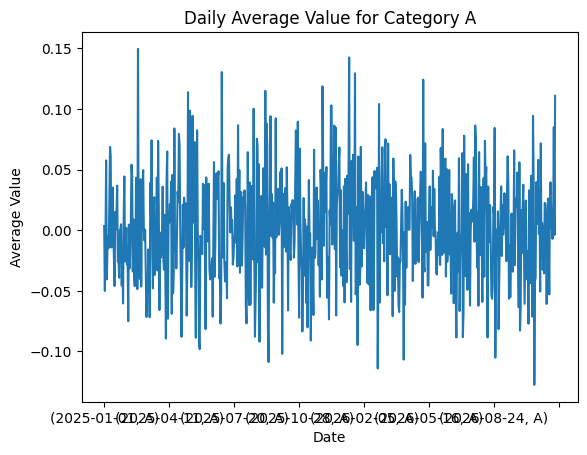

In [41]:
import matplotlib.pyplot as plt

category_a = daily_avg[daily_avg.index.get_level_values('category') == 'A']
category_a.plot(kind='line', title="Daily Average Value for Category A")
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.show()


In [42]:
result = dask_df.compute()  # This converts the Dask DataFrame to a Pandas DataFrame
print(result.head())  # Check the output


            timestamp     value category        date
0 2025-01-01 00:00:00  0.694421        B  2025-01-01
1 2025-01-01 00:01:00  2.392051        A  2025-01-01
2 2025-01-01 00:02:00  0.903472        C  2025-01-01
3 2025-01-01 00:03:00  1.219047        A  2025-01-01
4 2025-01-01 00:04:00  0.139122        A  2025-01-01


In [43]:
from dask.distributed import Client

try:
    client.close()  # Close the client if already started
except NameError:
    print("No active Dask client found.")
